<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT-10-FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA1/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hoa Dạ Uyên Thảo'):
    output= 0
  if file.startswith('Hoa Hải Đường'):
    output= 1
  if file.startswith('Hoa Hồng'):
    output= 2
  if file.startswith('Hoa Hồng Môn'):
    output= 3
  if file.startswith('Hoa Mai'):
    output= 4
  if file.startswith('Hoa Sen'):
    output= 5
  if file.startswith('Hoa Sứ Đỏ '):
    output= 6
  if file.startswith('Hoa Sứ Trắng'):
    output= 7
  if file.startswith('Hoa Thiên Điểu'):
    output= 8
  if file.startswith('Hoa Vạn Thọ'):
    output= 9 
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS', labels)

(1046, 128, 128, 3) (1046,)


In [4]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [5]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9

In [6]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.2,
    height_shift_range=0.2,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [7]:
x_train.shape

(836, 128, 128, 3)

In [8]:
y_train.shape

(836, 6)

In [9]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=200,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-9-0351de05a4f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/200
14/14 [==============================] - 17s 560ms/step - loss: 1.0227 - accuracy: 0.7500 - val_loss: 0.6378 - val_accuracy: 0.8190
Epoch 2/200
14/14 [==============================] - 4s 323ms/step - loss: 0.6702 - accuracy: 0.8062 - val_loss: 0.5667 - val_accuracy: 0.8190
Epoch 3/200
14/14 [==============================] - 6s 434ms/step - loss: 0.5999 - accuracy: 0.8050 - val_loss: 0.5154 - val_accuracy: 0.8190
Epoch 4/200
14/14 [==============================] - 4s 321ms/step - loss: 0.5739 - accuracy: 0.8050 - val_loss: 0.4900 - val_accuracy: 0.8190
Epoch 5/200
14/14 [==============================] - 4s 316ms/step - loss: 0.5631 - accuracy: 0.8050 - val_loss: 0.4736 - val_accuracy: 0.8190
Epoch 6/200
14/14 [==============================] - 6s 428ms/step - loss: 0.5246 - accuracy: 0.8050 - val_loss: 0.4558 - val_accuracy: 0.8190
Epoch 7/200
14/14 [==============================] - 4s 314ms/step - loss: 0.4891 - accuracy: 0.8062 - val_loss: 0.3855 - val_accuracy: 0.833

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

7/7 [==============================] - 0s 33ms/step - loss: 19.7271 - accuracy: 0.9048
Accuracy: 0.9047619104385376
Loss: 19.727128982543945


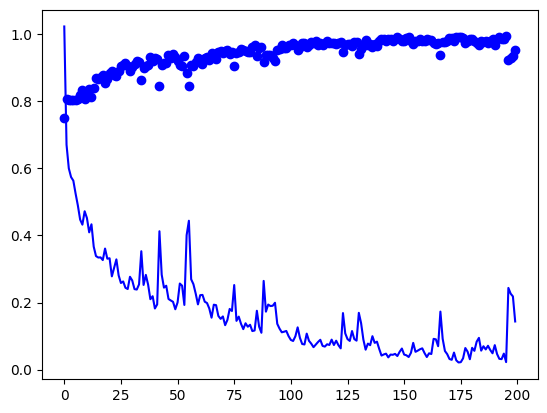

In [11]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [12]:
#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/FLOWER/MODEL_INCEPTION.h5')